# Домашняя работа №1

In [26]:
import cv2
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
def plot_one_image(image: np.ndarray) -> None:
	"""
	Отобразить изображение с помощью matplotlib.
	Вспомогательная функция.
	
	:param image: изображение для отображения
	:return: None
	"""
	fig, axs = plt.subplots(1, 1, figsize=(8, 7))
	
	axs.imshow(image)
	axs.axis('off')
	plt.plot()

# Задача №1 - Лабиринт

Реализуйте алгоритм поиска выхода из лабиринта по растровому изобажению.
Вам нужно написать код, который будет находить путь (координаты пикселей) от заданного входа сверху до выхода снизу.

Отрисуйте получившийся маршрут на карте с помощью функции ```plot_maze_path(img, coords)``` или воспользуйтесь вам известным графическим инструментом.

__Input:__

Изображение лабиринта в кодировке $RGB$.

Все карты лежат на [яндекс-диске](https://yadi.sk/d/qEWVZk2picDdZw)

__Ouput:__

Массив координат пути через лабиринт в виде ```(np.array(x), np.array(y))```. 

Оценивается __каждое__ успешное решение лабиринта.
Пример решенной задачи.<img src="https://b.radikal.ru/b22/1906/56/df991f2221a7.png" width="300">

In [28]:
test_image = cv2.imread('lab1\\task_1\\20 by 20 orthogonal maze.png', cv2.IMREAD_GRAYSCALE)
test_image = test_image[1:test_image.shape[0]-1, 1:test_image.shape[1]-1]
CELLS_COUNT_WIDTH=20
CELLS_COUNT_HEIGHT=20
CELL_SIZE=int(test_image.shape[1]/CELLS_COUNT_WIDTH)

In [29]:
def getLabyrinthMap(image, coordinate): 
	pixels = []
	
	for i in range(CELL_SIZE*coordinate[0], CELL_SIZE*(coordinate[0]+1)):
		pixels_row = []
		for j in range(CELL_SIZE*coordinate[1], CELL_SIZE*(coordinate[1]+1)):
			pixels_row.append(image[i][j])
		pixels.append(pixels_row)
	pixels=np.array(pixels)
	
	cell_open_up=bool(pixels[0, int(CELL_SIZE/2)])*1000
	cell_open_down=bool(pixels[int(CELL_SIZE-1), int(CELL_SIZE/2)])*100
	cell_open_left=bool(pixels[int(CELL_SIZE/2), 0])*10
	cell_open_right=bool(pixels[int(CELL_SIZE/2), int(CELL_SIZE-1)])*1

	return cell_open_up+cell_open_down+cell_open_left+cell_open_right

In [30]:
def getLabyrinthPath(image : np.ndarray, location_start : tuple[int, int], location_end : tuple[int, int], cells_count_height : int, cells_count_width : int):
	cells = []
	
	for coordinate in range (cells_count_width):
		cells.append([])
		for j in range(cells_count_height):
			cell_type = getLabyrinthMap(image, (j, coordinate))
			if((location_start[0]==coordinate and location_start[1]==j) or (location_end[0]==coordinate and location_end[1]==j)):
				if j==0 and cell_type>=1000:
					cell_type=cell_type-1000
				if j==cells_count_height-1 and cell_type%1000>=100:
					cell_type=cell_type-100
			cells[coordinate].append(cell_type)

	path : list[tuple[int, int]] = [location_start]
	prev = [0]
	path_length = 0

	while True:
		row, column = path[path_length][0], path[path_length][1]
		if path[-1]==location_end:
			break
		if cells[column][row] > 0:
			prev.append(len(path))
		if cells[column][row]>999:	#Go up
			cells[column][row]=cells[column][row]-1000
			row=row-1
			path.append((row, column))
			cells[column][row]=cells[column][row]-100
			path_length=path_length+1
			continue
		if cells[column][row]>99:	#Go down
			cells[column][row]=cells[column][row]-100
			row=row+1
			path.append((row, column))
			cells[column][row]=cells[column][row]-1000
			path_length=path_length+1
			continue
		if cells[column][row]>9:	#Go left
			cells[column][row]=cells[column][row]-10
			column=column-1
			path.append((row, column))
			cells[column][row]=cells[column][row]-1
			path_length=path_length+1
			continue
		if cells[column][row]==1:	#Go right
			cells[column][row]=cells[column][row]-1
			column=column+1
			path.append((row, column))
			cells[column][row]=cells[column][row]-10
			path_length=path_length+1
			continue
		else: 						#remove closed paths
			path.pop()
			prev.pop()
			path_length=prev[-1]
		
	return path

In [31]:
def pathHighlight(image, path):
	for location in path: 
		for i in range(CELL_SIZE*location[0]+5, CELL_SIZE*(location[0]+1)-5):
			for j in range(CELL_SIZE*location[1]+5, CELL_SIZE*(location[1]+1)-5):
				image[i, j]=image[i, j]-100
		cv2.imshow(str(location), image)
		cv2.waitKey(150)
		cv2.destroyAllWindows()
	return image

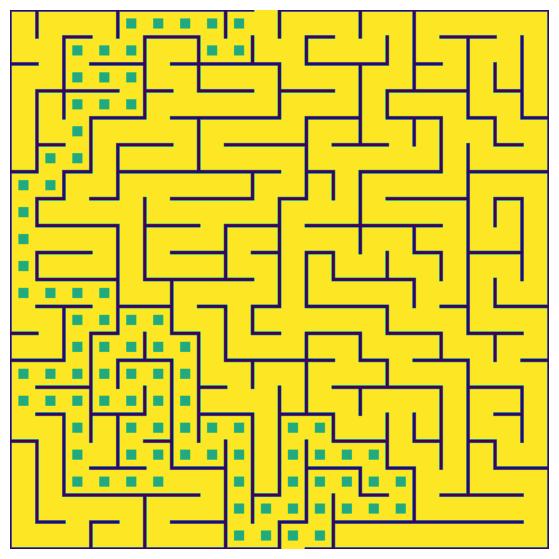

In [32]:
plot_one_image(pathHighlight(test_image, getLabyrinthPath(test_image, (0, 8), (19, 10), CELLS_COUNT_HEIGHT, CELLS_COUNT_WIDTH)))

# Задача №2 - Пробки в городе

Требуется написать программу, которая на вход принимает картинку, на которой схематически изображена машинка на дороге с $N$ полосами и препятствия на полосах. Соответствующие объекты обозначены цветами, которые сохраняются на всех изображениях. 

Результатом работы программы является номер полосы, на которую нужно перестроиться или сообщение о том, что перестраиваться не нужно.

**Примечание: номер дороги считается слева направо, отсчет начинается с нуля.**

Примеры изображений:
<table><tr>
	 <td> <img src="https://i.ibb.co/8z84sJG/image_00.jpg" alt="Drawing" style="width: 200px;"/> </td>
	 <td> <img src="https://i.ibb.co/Z6m4XFz/image_01.jpg" alt="Drawing" style="width: 200px;"/> </td>
</tr></table>

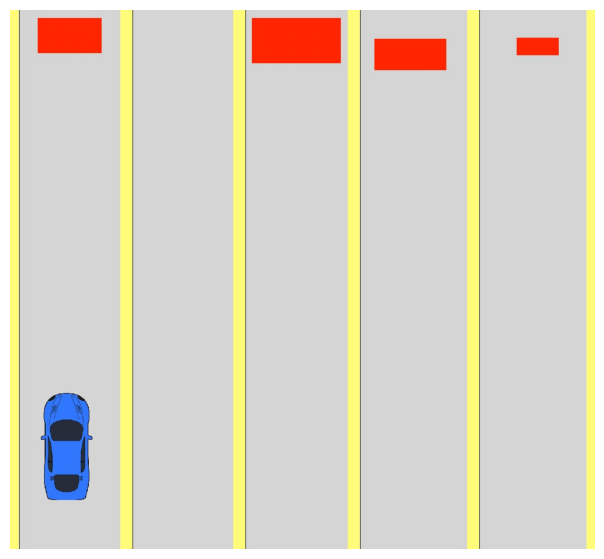

In [44]:
test_image = cv2.imread('lab1/task_2/image_00.jpg')
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
plot_one_image(test_image)

In [45]:
ROADS_COUNT=5
ROAD_WIDTH=int(test_image.shape[1]/ROADS_COUNT)

In [65]:
def findRoadNumber(image : np.ndarray):
	road_with_car_number=-1
	road_numbers_free : list[int]=[]
	road_numbers_not_free : list[int]=[]
	is_road_not_free : bool
	is_car_found : bool
	
	for road_number in range(ROAD_WIDTH):
		column_number_road_end=(road_number+1)*ROAD_WIDTH
		if column_number_road_end>image.shape[1] :
			break
		column_number_road_start=column_number_road_end-ROAD_WIDTH
		is_road_not_free=False
		is_car_found=False
		
		for i in range(column_number_road_start, column_number_road_start+ROAD_WIDTH):
			for j in range(image.shape[0]):
				if image[j, i, 0]>50 and int(image[j, i, 0])>int(image[j, i, 1])+int(image[j, i, 2]):	#If the color is red
					road_numbers_not_free.append(road_number)
					is_road_not_free=True
					if road_with_car_number>-1:
						break
				if image[j, i, 2]>50 and image[j, i, 0]>int(image[j, i, 0])+int(image[j, i, 1]):
					road_with_car_number=road_number
					is_car_found=True
					break
			if is_road_not_free or is_car_found:
				break
		if is_road_not_free==False:
			if road_with_car_number==road_number:
				print("Car shouldn't change lane.")
				return road_with_car_number
			road_numbers_free.append(road_number)
			
	roads_free_count=len(road_numbers_free)
	if roads_free_count==0:
		return -1
	return road_numbers_free[np.random.randint(0, roads_free_count)]
	

In [67]:
road_number = findRoadNumber(test_image)

print(f'Нужно перестроиться на дорогу номер {road_number}')

Нужно перестроиться на дорогу номер 1


# Задача №3 - Аффинные преобразования

## Задача №3.1 - Поверни изображение

Реализуйте функцию, которая поворачивает изображение вокруг заданной точки на заданный угол ($0^\circ-360^\circ$) и преобразует размер изображения, чтобы оно не обрезалось после поворота.

In [68]:
def rotate(image, point, angle: float) -> np.ndarray:
	"""
	Повернуть изображение по часовой стрелке на угол от 0 до 360 градусов и преобразовать размер изображения.

	:param image: исходное изображение
	:param point: значение точки (x, y), вокруг которой повернуть изображение
	:param angle: угол поворота
	:return: повернутное изображение
	"""
	height, width = image.shape[0], image.shape[1]
	if point is None:
		point = (width // 2, height // 2)

	rotation_matrix = cv2.getRotationMatrix2D(point, angle, 1.0)
	cos = np.abs(rotation_matrix[0, 0])
	sin = np.abs(rotation_matrix[0, 1])
	width_new = int((height * sin) + (width * cos))
	height_new = int((height * cos) + (width * sin))
	rotation_matrix[0, 2] += (width_new / 2) - point[0]
	rotation_matrix[1, 2] += (height_new / 2) - point[1]

	return cv2.warpAffine(image, rotation_matrix, (width_new, height_new))

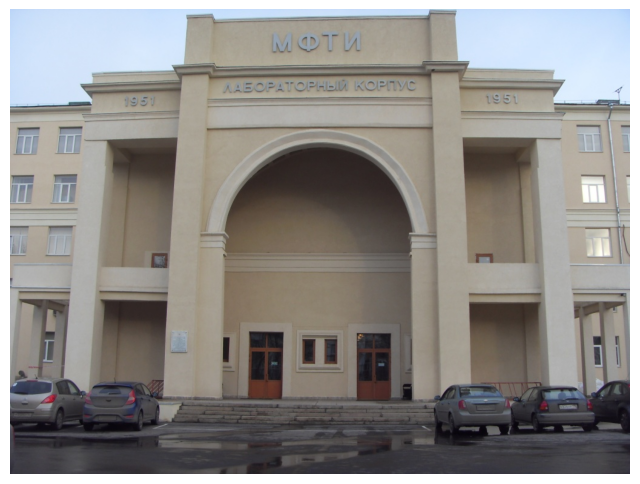

In [69]:
test_image = cv2.imread('lab1/task_3/lk.jpg')
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
plot_one_image(test_image)

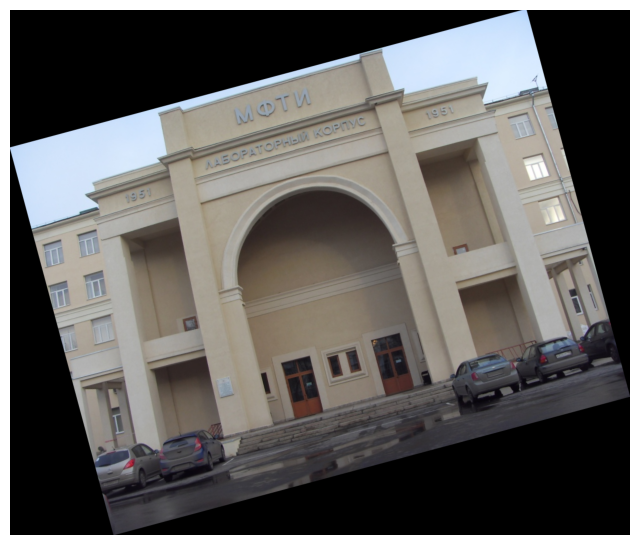

In [70]:
test_point = None
test_angle = 15

transformed_image = rotate(test_image, test_point, test_angle)
plot_one_image(transformed_image)

Проверьте как это должно было получиться

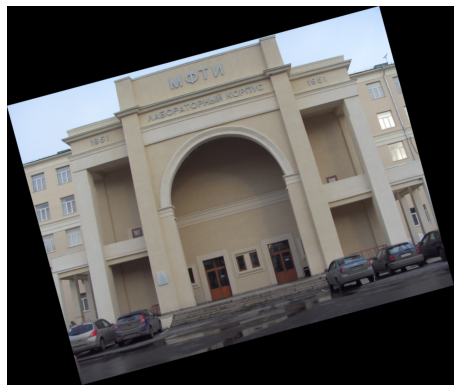

In [8]:
result_image = cv2.imread('task_3/lk_rotate.jpg')
result_image = cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB)
plot_one_image(result_image)

## Задача №3.2 - Афинные преобразования

Реализуйте функцию, которая применяет афинное преобразование между заданными точками на исходном изображении и преобразует размер получившегося изображения, чтобы оно не обрезалось.

In [73]:
def apply_warpAffinee(image, points1, points2) -> np.ndarray:
	"""
	Применить афинное преобразование согласно переходу точек points1 -> points2 и
	преобразовать размер изображения.

	:param image:
	:param points1:
	:param points2:
	:return: преобразованное изображение
	"""
	affine_transform = cv2.getAffineTransform(points1, points2)
	height, width = image.shape[0], image.shape[1]
	corners = np.float32([[0, 0], [width, 0], [width, height], [0, height]])
	transformed_corners = cv2.transform(np.array([corners]), affine_transform)[0]

	min_x = min(transformed_corners[:, 0])
	max_x = max(transformed_corners[:, 0])
	min_y = min(transformed_corners[:, 1])
	max_y = max(transformed_corners[:, 1])
	width_new = int(max_x - min_x)
	height_new = int(max_y - min_y)
	translation_matrix = np.array([[1, 0, -min_x], [0, 1, -min_y]], dtype=np.float32)
	affine_transform_translated = np.dot(translation_matrix, np.vstack([affine_transform, [0, 0, 1]]))[:2, :]

	return cv2.warpAffine(image, affine_transform_translated, (width_new, height_new))

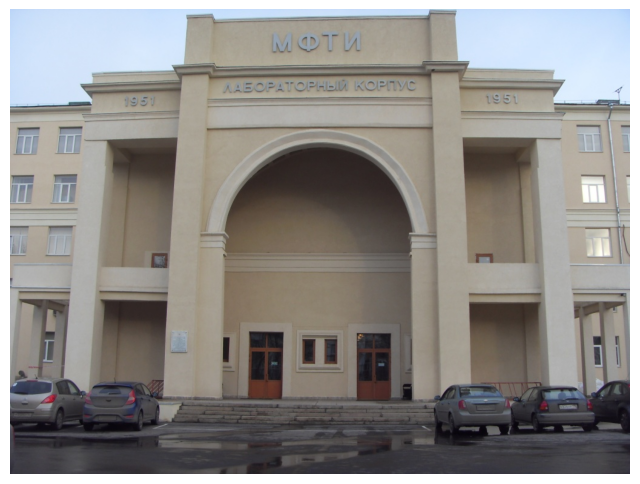

In [74]:
test_image = cv2.imread('lab1/task_3/lk.jpg')
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
plot_one_image(test_image)

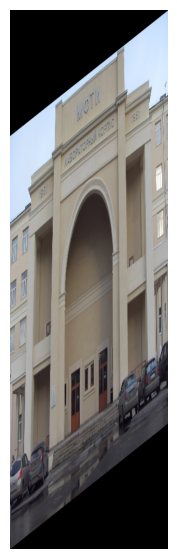

In [75]:
test_point_1 = np.float32([[50, 50], [400, 50], [50, 200]])
test_point_2 = np.float32([[100, 100], [200, 20], [100, 250]]) 

transformed_image = apply_warpAffinee(test_image, test_point_1, test_point_2)
plot_one_image(transformed_image)

Проверьте как это должно было получиться

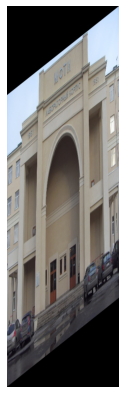

In [ ]:
result_image = cv2.imread('task_3/lk_affine.jpg')
result_image = cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB)
plot_one_image(result_image)